In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('predictive_maintenance.csv')

In [3]:
df.shape

(10000, 10)

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


- On n'a pas de valeurs manquantes.
- On a 3 attributs de type réel, 4 de type entier et 3 de type objet.
- Les attributs UDI et Product ID n'ont aucune importance pour le modèle donc nous allons les supprimer.

## Data Cleaning

In [7]:
df=df.drop(['UDI','Product ID'],axis=1)

In [8]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

- Seulement 3.4% des machines ont tombés en panne.Les classes ne sont pas équilibrés

In [9]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

- 9661 des machines n'ont pas tombés en panne dans la colonne Target par contre dans la colonne Failure Type 9652 seulement ont tombés en panne.

In [10]:
df[(df['Target']==0) & (df['Failure Type']!='No Failure')]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [11]:
df=df[~((df['Target']==0) & (df['Failure Type']!='No Failure'))]

In [12]:
df.shape

(9982, 8)

In [13]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

- Vérifions si toutes les lignes qui ont des pannes dans la colonne Target, n'ont pas la valeur pas de panne dans la colonne Type de panne

In [14]:
df[(df['Target']==1) & (df['Failure Type']=='No Failure')]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [15]:
df=df[~((df['Target']==1) & (df['Failure Type']=='No Failure'))]

In [16]:
df.shape

(9973, 8)

In [17]:
df['Type'].value_counts()

L    5984
M    2991
H     998
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x18d31b9e200>,
 [Text(-0.3399845930712328, 1.0461407536628082, 'Low'),
  Text(-0.00017322822522085294, -1.0999999863599919, 'Medium'),
  Text(1.046087207809097, -0.34014931083006333, 'High')],
 [Text(-0.1854461416752179, 0.5706222292706226, '60.0%'),
  Text(-9.448812284773796e-05, -0.5999999925599955, '30.0%'),
  Text(0.5705930224413256, -0.18553598772548907, '10.0%')])

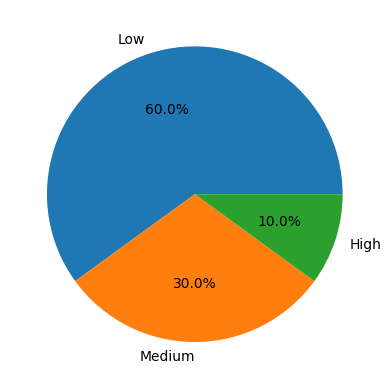

In [18]:
L1=['Low','Medium','High']
L2=[5984,2991,998]
plt.pie(L2,labels=L1,autopct='%1.1f%%')

- 60% des machines ont une haute qualité,30% ont une qualité moyenne et 10% sont de basse qualité

In [19]:
(df.loc[df['Type']=='L','Target']==1).sum()

231

In [20]:
(df.loc[df['Type']=='H','Target']==1).sum()

20

- Plus de 60% des pannes (70% =231/330) sont causés par des machines de basse qualité et moins de 10% des pannes(6% =20/330) sont causés par des machines de basse qualité ce qui est logique.

## Outliers Detection

In [21]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


- On remarque qu'il y a des valeurs aberrantes pour les variables vitesse de rotation et moment de torsion.

In [22]:
list1=[i for i in df.select_dtypes('float')]
list2=[i for i in df.select_dtypes('int')]
list3=list1+list2
list3.remove('Target')
list3

['Air temperature [K]',
 'Process temperature [K]',
 'Torque [Nm]',
 'Rotational speed [rpm]',
 'Tool wear [min]']

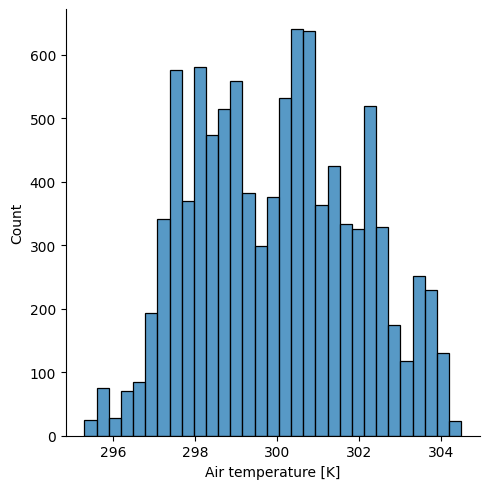

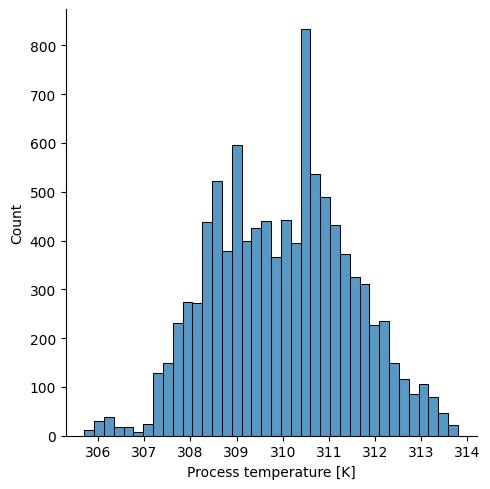

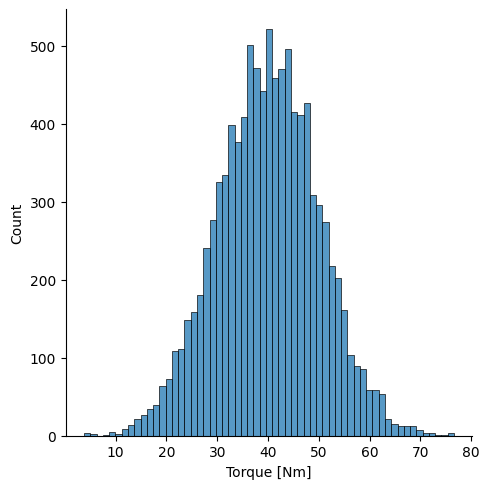

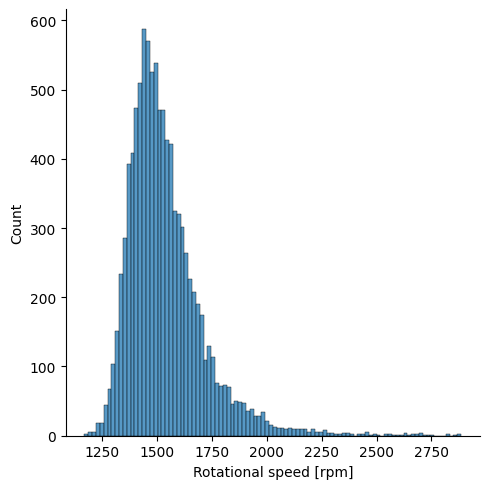

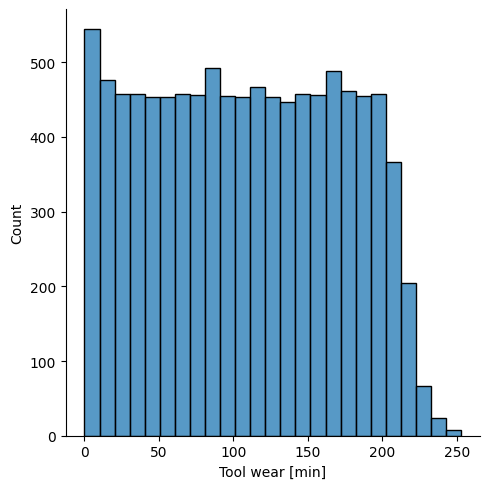

In [23]:
for col in list3:
    sns.displot(df[col])

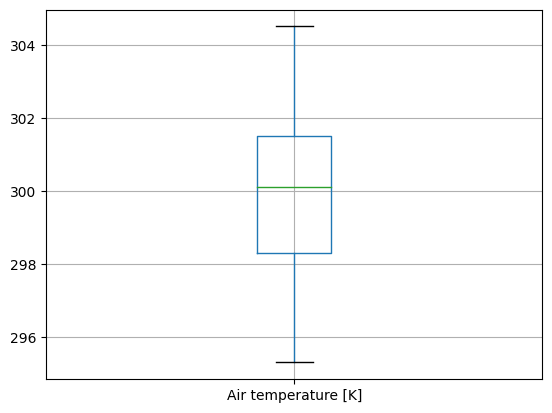

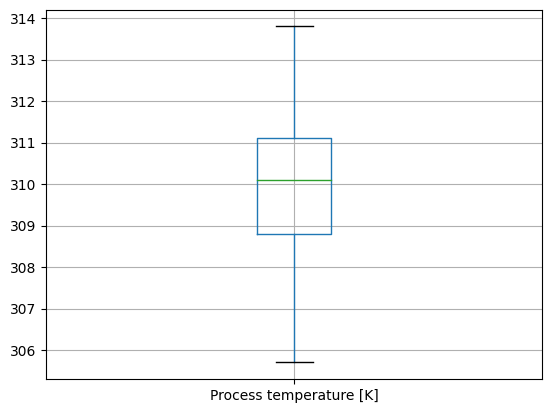

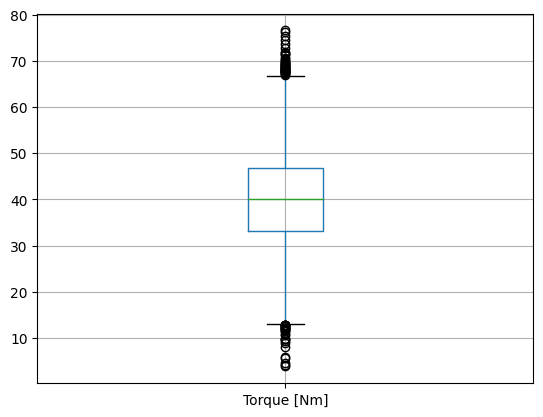

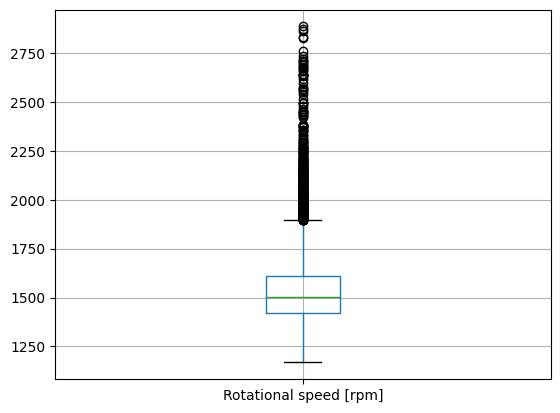

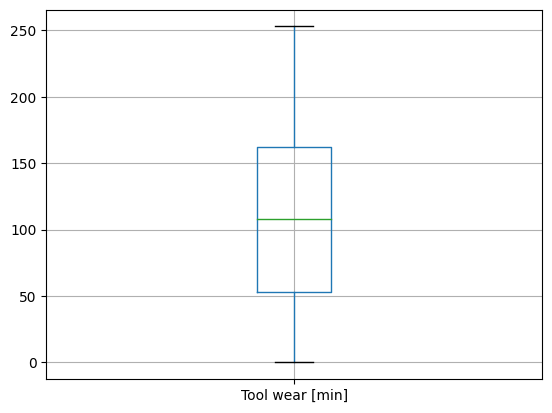

In [24]:
for col in list3:
    plt.figure()
    df.boxplot([col])

- Ce graphe nous montre qu'il y a des valeurs aberrantes pour les variables vitesse de rotation et moment de torsion.Vérifions si ces valeurs sont des fautes ou bien sont la cause d'une panne.

In [25]:
df[(df['Torque [Nm]']<13)]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
194,M,298.2,308.5,2678,10.7,86,1,Power Failure
380,L,297.5,308.3,2564,12.8,127,1,Power Failure
463,L,297.4,308.7,2874,4.2,118,1,Power Failure
847,L,296.4,307.4,2833,5.6,213,1,Power Failure
1095,L,296.9,307.5,2721,9.3,18,1,Power Failure
1391,L,298.9,310.2,2737,8.8,142,1,Power Failure
1784,L,298.3,308.0,2886,3.8,57,1,Power Failure
1808,L,298.1,307.7,2567,12.8,125,1,Power Failure
3140,H,300.4,309.9,2563,12.8,81,1,Power Failure


In [26]:
df[(df['Torque [Nm]']>68)]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
603,L,297.9,309.8,1336,71.6,31,1,Power Failure
880,M,295.8,306.3,1235,76.2,89,1,Power Failure
1016,M,296.3,307.2,1319,68.3,24,1,Power Failure
1124,M,296.7,307.8,1258,69.0,105,1,Power Failure
1144,L,297.0,307.9,1296,69.1,153,1,Power Failure
1324,M,298.8,310.1,1243,74.5,194,1,Power Failure
1496,L,298.0,308.7,1268,69.4,189,1,Power Failure
2125,L,299.3,308.9,1258,69.4,119,1,Power Failure
2444,L,299.2,308.6,1267,68.2,76,1,Power Failure
3000,H,300.5,309.8,1324,72.8,159,1,Power Failure


- Si le moment de torsion est inférieur à 14 Nm et la vitesse de rotation est supérieur à 2500 rpm on a souvent une panne de courant.
- Si le moment de torsion est supérieur à 68 Nm on a souvent une panne de courant.

In [27]:
df[df['Rotational speed [rpm]']>1950].shape[0]

308

In [28]:
df[df['Rotational speed [rpm]']>1950]['Failure Type'].value_counts()

No Failure           274
Power Failure         31
Tool Wear Failure      3
Name: Failure Type, dtype: int64

- 308 des machines ont une vitesse supérieur à 1950 Nm dont 31 ont eu une panne de courant càd à peu près 32%(31/95) des machines qui ont eu ce type de panne dans la dataset.
- Les valeurs aberrantes dans notre dataset ne sont pas des fautes.

In [29]:
df.groupby(['Target']).median(numeric_only=True)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Target,,,,,
0,300.0,310.0,1507.0,39.80,107.0
1,301.6,310.4,1363.5,53.85,167.0


In [30]:
df.groupby(['Failure Type']).median(numeric_only=True)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Failure Type,,,,,,
Heat Dissipation Failure,302.45,310.7,1346.0,52.35,106.0,1.0
No Failure,300.00,310.0,1507.0,39.80,107.0,0.0
Overstrain Failure,299.45,310.1,1362.5,56.75,207.0,1.0
Power Failure,300.40,310.2,1386.0,63.60,100.0,1.0
Tool Wear Failure,300.40,310.3,1521.0,37.70,215.0,1.0


### Correlation between variables

<Axes: >

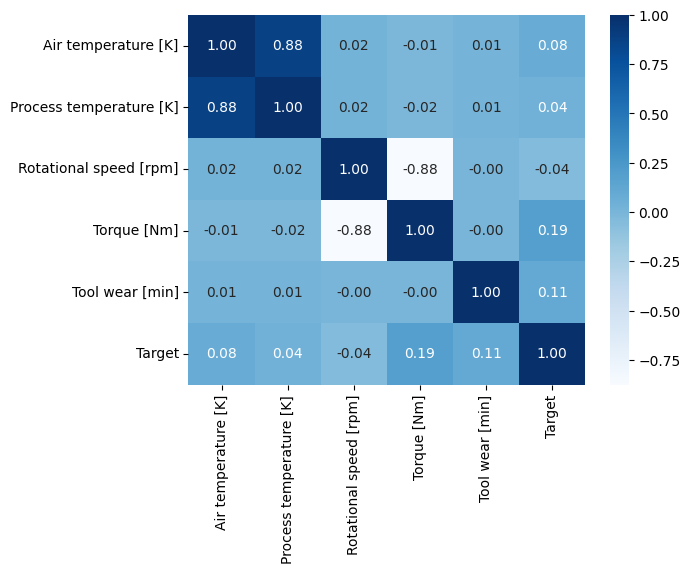

In [31]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cbar=True,fmt='.2f',annot=True,cmap='Blues')

- Il exite une forte corrélation entre les variables température de l'air et température du processus.

## Feature Engineering

- On va créer des nouvelles variables:
- Difference of temperatures = Air temperature - Process temperature
- Power = 0.105 * Rotational speed * Torque
- Overstrain = Torque * Tool wear

In [32]:
df['Difference of temperature [K]']=df['Process temperature [K]']-df['Air temperature [K]']
df['Power [W]']=0.105*df['Torque [Nm]']*df['Rotational speed [rpm]']
df['Overstrain']=df['Tool wear [min]']*df['Torque [Nm]']
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Difference of temperature [K],Power [W],Overstrain
0,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,6970.1940,0.0
1,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,6844.9920,138.9
2,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,7770.1260,247.0
3,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,5943.3675,276.5
4,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,5913.6000,360.0


- On va supprimer les colonnes Air temperature, Process temperature, Rotational speed et Torque.

In [33]:
df1=df.copy()
df1=df1.drop(['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]'],axis=1)
df1.head()

,Type,Tool wear [min],Target,Failure Type,Difference of temperature [K],Power [W],Overstrain
0,M,0,0,No Failure,10.5,6970.1940,0.0
1,L,3,0,No Failure,10.5,6844.9920,138.9
2,L,5,0,No Failure,10.4,7770.1260,247.0
3,L,7,0,No Failure,10.4,5943.3675,276.5
4,L,9,0,No Failure,10.5,5913.6000,360.0


- On va ajouter ensuite des variables polynomiales.

## Data Preprocessing 

- Nous devons encoder les variables catégorielles

In [34]:
df2=df1.copy()
df2=pd.get_dummies(data=df,columns=['Type'])
df2['Failure Type']=df2['Failure Type'].replace({'No Failure':0,'Heat Dissipation Failure':1,'Power Failure':2,'Overstrain Failure':3,'Tool Wear Failure':4})
df2.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Difference of temperature [K],Power [W],Overstrain,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,10.5,6970.1940,0.0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,10.5,6844.9920,138.9,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,10.4,7770.1260,247.0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,10.4,5943.3675,276.5,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,10.5,5913.6000,360.0,0,1,0


In [35]:
X=df2.drop(['Target','Failure Type'],axis=1)
y1=df2['Target']
y2=df2['Failure Type']

- Nous allons prédire si une machine tombe en panne:classifiaction binaire et le type de panne: classification multiclasse

- Nous allons entraîner 70% de nos données et tester sur les 30% restants

In [36]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y1,test_size=0.3,random_state=0,stratify=y2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y2,test_size=0.3,random_state=0,stratify=y2)

## Building the models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures

In [38]:
def evaluation1(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print('rapport de classification pour le train set:')
    print(classification_report(y_train,y_pred_train))
    print('rapport de classification pour le test set:')
    print(classification_report(y_test,y_pred_test))
    sns.heatmap(confusion_matrix(y_test,y_pred_test),xticklabels=['No Failure','Failure'],yticklabels=['No Failure','Failure'],annot=True,cmap='Blues',cbar=False,fmt='d')

In [39]:
def evaluation2(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print('rapport de classification pour le train set:')
    print(classification_report(y_train,y_pred_train))
    print('rapport de classification pour le test set:')
    print(classification_report(y_test,y_pred_test))
    print('matrice de confusion:')
    sns.heatmap(confusion_matrix(y_test,y_pred_test),xticklabels=['No Failure','Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure'],yticklabels=['No Failure','Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure'],annot=True,cmap='Blues',cbar=False,fmt='d')

### SVM

- On doit normaliser tout d'abord les variables quantitatives.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
col_tr=make_column_transformer((StandardScaler(),list3),remainder='passthrough')

In [41]:
pipe1=make_pipeline(col_tr,PolynomialFeatures(3),SVC(random_state=0))

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6750
           1       0.83      0.29      0.43       231

    accuracy                           0.97      6981
   macro avg       0.90      0.64      0.71      6981
weighted avg       0.97      0.97      0.97      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2893
           1       0.84      0.32      0.47        99

    accuracy                           0.98      2992
   macro avg       0.91      0.66      0.73      2992
weighted avg       0.97      0.98      0.97      2992



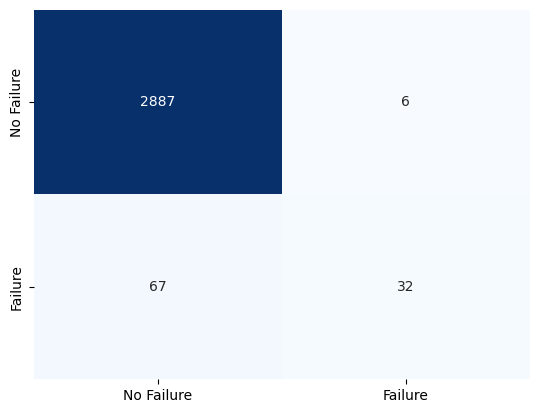

In [42]:
evaluation1(pipe1,X_train1,y_train1,X_test1,y_test1)

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6750
           1       0.00      0.00      0.00        78
           2       0.97      0.44      0.60        66
           3       0.69      0.82      0.75        55
           4       0.00      0.00      0.00        32

    accuracy                           0.98      6981
   macro avg       0.53      0.45      0.47      6981
weighted avg       0.96      0.98      0.97      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2893
           1       0.00      0.00      0.00        34
           2       0.77      0.34      0.48        29
           3       0.63      0.74      0.68        23
           4       0.00      0.00      0.00        13

    accuracy                           0.97      2992
   macro avg       0.48      0.42      0.4

C:\Users\user\anaconda3\envs\tf_2.11\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\tf_2.11\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\tf_2.11\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaco

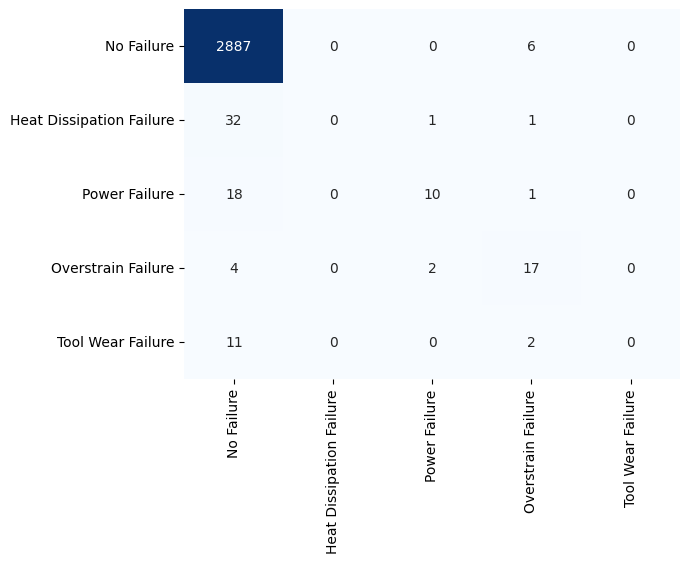

In [47]:
evaluation2(pipe1,X_train2,y_train2,X_test2,y_test2)

- Pour la classification binaire on a obtenu un recall égale à 0.29 càd on a pu identifier seulement 29% des pannes.
- Pour la classification multiclasse on a un f1 score égale à 0 pour les pannes à cause d'une dissipation thermique et à cause de l'usure des outils donc le modèle n'a prédit aucune panne de ces types et on un recall égale à 34% pour la panne à cause de la puissance et égale à 74% pour la panne à cause du surmenage 

### Random Forest

In [44]:
pipe2=make_pipeline(PolynomialFeatures(3),RandomForestClassifier(random_state=0))

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00       231

    accuracy                           1.00      6981
   macro avg       1.00      1.00      1.00      6981
weighted avg       1.00      1.00      1.00      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2893
           1       0.97      0.88      0.92        99

    accuracy                           0.99      2992
   macro avg       0.98      0.94      0.96      2992
weighted avg       0.99      0.99      0.99      2992



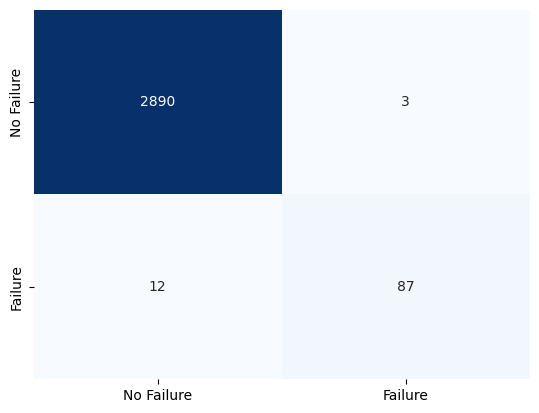

In [45]:
evaluation1(pipe2,X_train1,y_train1,X_test1,y_test1)

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        32

    accuracy                           1.00      6981
   macro avg       1.00      1.00      1.00      6981
weighted avg       1.00      1.00      1.00      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2893
           1       0.94      0.91      0.93        34
           2       0.96      0.93      0.95        29
           3       0.81      0.96      0.88        23
           4       1.00      0.08      0.14        13

    accuracy                           0.99      2992
   macro avg       0.94      0.78      0.7

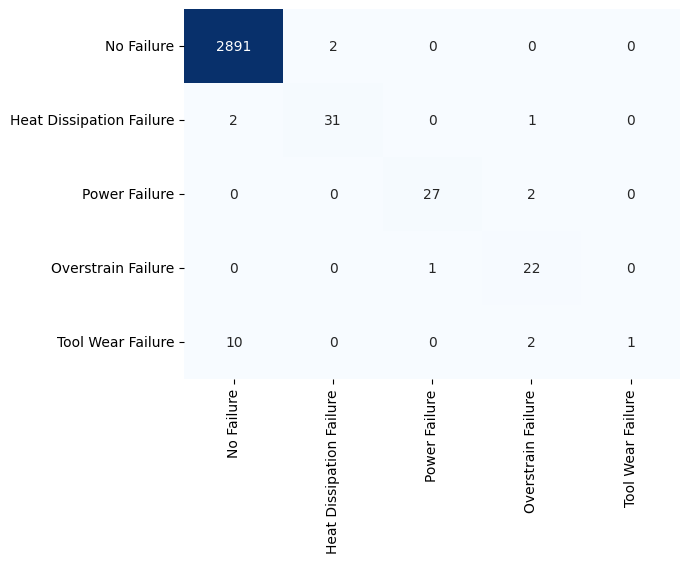

In [46]:
evaluation2(pipe2,X_train2,y_train2,X_test2,y_test2)

- Random Forest a la meilleure perfermance.Dans la tâche de classification binaire le score f1 pour cet algorithme est égale à 0.92 et le recall est égale à 0.88 càd dans 88% des cas on a pu identifier les pannes.La précision est égale 0.97 càd seulement dans 3% des cas ou la machine n'a pas de panne on a prédit qu'elle a une défaillance.
- Pour la tâche de classification multiclasse on a un score f1 et un recall supérieur à 0.9 pour tous les types de pannes seulement pour la panne à cause de l'usure de la machine.Pour ce type de défaillance on a un recall 0.8.Parmi les 13 machines qui ont eu ce type de panne on a pu identifier une seule machine,on a prédit que 10 machines n'ont pas une défaillance et 2 machines ont une panne à cause de surrmenage.
- Essayons maintenant d'équilbrer notre dataset en utilisant la technique d'oversampling with SMOTE et voyons si on va obtenir de meilleurs performances pour ces algorithmes.

## Oversampling with SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_sm1,y_sm1=smote.fit_resample(X_train1,y_train1)
y_sm1.value_counts()

1    6750
0    6750
Name: Target, dtype: int64

In [50]:
X_sm2,y_sm2=smote.fit_resample(X_train2,y_train2)
y_sm2.value_counts()

3    6750
0    6750
1    6750
2    6750
4    6750
Name: Failure Type, dtype: int64

### SVM 

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      6750
           1       0.88      0.66      0.76      6750

    accuracy                           0.79     13500
   macro avg       0.80      0.79      0.78     13500
weighted avg       0.80      0.79      0.78     13500

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2893
           1       0.20      0.63      0.31        99

    accuracy                           0.91      2992
   macro avg       0.59      0.77      0.63      2992
weighted avg       0.96      0.91      0.93      2992



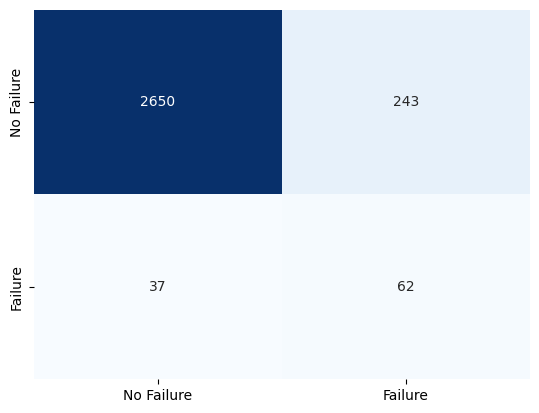

In [51]:
evaluation1(pipe1,X_sm1,y_sm1,X_test1,y_test1)

- Pour la classification binaire,on remarque que le recall de l'algorithme SVM a amélioré.Il a augmenté de 0.29 à 0.63 alors que la précision a diminué de 0.84 à 0.20 et par suite le f1 score a diminué de 0.47 à 0.31

### Random Forest

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00      6750

    accuracy                           1.00     13500
   macro avg       1.00      1.00      1.00     13500
weighted avg       1.00      1.00      1.00     13500

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2893
           1       0.72      0.89      0.79        99

    accuracy                           0.98      2992
   macro avg       0.86      0.94      0.89      2992
weighted avg       0.99      0.98      0.99      2992



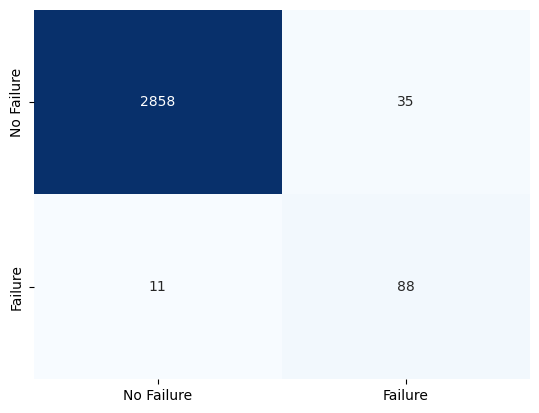

In [54]:
evaluation1(pipe2,X_sm1,y_sm1,X_test1,y_test1)

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00      6750
           2       1.00      1.00      1.00      6750
           3       1.00      1.00      1.00      6750
           4       1.00      1.00      1.00      6750

    accuracy                           1.00     33750
   macro avg       1.00      1.00      1.00     33750
weighted avg       1.00      1.00      1.00     33750

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2893
           1       0.92      0.97      0.94        34
           2       0.91      1.00      0.95        29
           3       0.95      0.78      0.86        23
           4       0.08      0.15      0.11        13

    accuracy                           0.99      2992
   macro avg       0.77      0.78      0.7

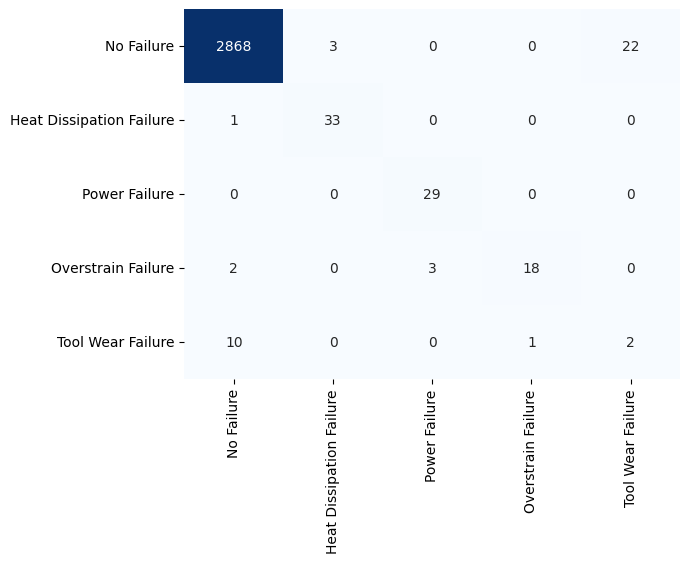

In [55]:
evaluation2(pipe2,X_sm2,y_sm2,X_test2,y_test2)

- Pour le Random Forest, l'oversampling with smote a diminué la précision et le recall reste presque le même ainsi le f1 score a diminué. Donc, le meilleur modèle pour les deux tâches est le Random Forest avant d'appliquer l'oversampling with smote.

## Preparing a model for deployment

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00       231

    accuracy                           1.00      6981
   macro avg       1.00      1.00      1.00      6981
weighted avg       1.00      1.00      1.00      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2893
           1       0.95      0.75      0.84        99

    accuracy                           0.99      2992
   macro avg       0.97      0.87      0.92      2992
weighted avg       0.99      0.99      0.99      2992



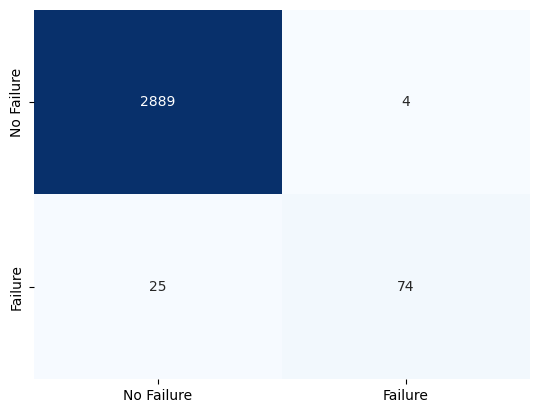

In [80]:
from sklearn.preprocessing import OneHotEncoder
df3=df.copy()
df3=df3.drop(['Difference of temperature [K]','Power [W]','Overstrain'],axis=1)
df3['Failure Type']=df3['Failure Type'].replace({'No Failure':0,'Heat Dissipation Failure':1,'Power Failure':2,'Overstrain Failure':3,'Tool Wear Failure':4})
Xn=df3.drop(['Target','Failure Type'],axis=1)
y1n=df3['Target']
y2n=df3['Failure Type']
X_train1n,X_test1n,y_train1n,y_test1n=train_test_split(Xn,y1n,test_size=0.3,random_state=0,stratify=y2n)
X_train2n,X_test2n,y_train2n,y_test2n=train_test_split(Xn,y2n,test_size=0.3,random_state=0,stratify=y2n)
ohe=OneHotEncoder()
ohe.fit(X[['Type']])
col_tr2=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Type']),remainder='passthrough')
pipe3=make_pipeline(col_tr2,PolynomialFeatures(3),RandomForestClassifier(random_state=0))
evaluation1(pipe3,X_train1n,y_train1n,X_test1n,y_test1n)

rapport de classification pour le train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6750
           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        32

    accuracy                           1.00      6981
   macro avg       1.00      1.00      1.00      6981
weighted avg       1.00      1.00      1.00      6981

rapport de classification pour le test set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2893
           1       0.89      0.50      0.64        34
           2       0.96      0.90      0.93        29
           3       0.81      0.96      0.88        23
           4       0.50      0.08      0.13        13

    accuracy                           0.99      2992
   macro avg       0.83      0.69      0.7

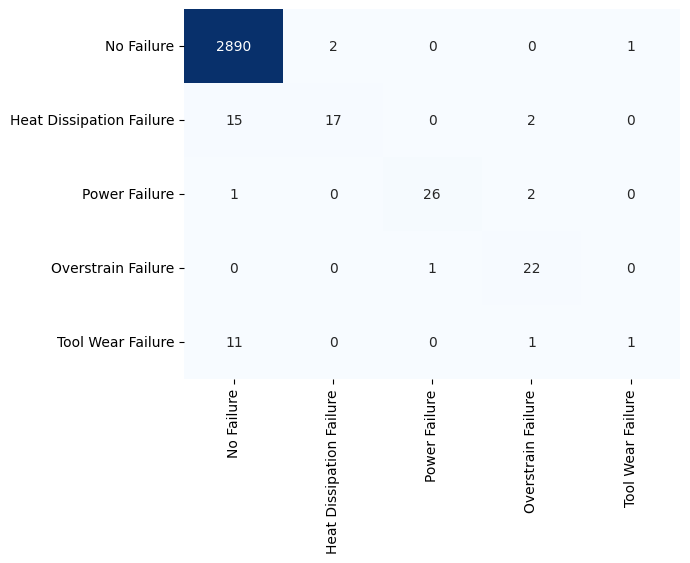

In [81]:
evaluation2(pipe3,X_train2n,y_train2n,X_test2n,y_test2n)

In [95]:
df3.reset_index(drop=True)
df3.to_csv('cleaned_pred_maintenance_data.csv')

In [86]:
pipe4=pipe3.fit(X_train2n,y_train2n)

In [87]:
import pickle
pickle.dump(pipe4,open('pred_maintenance.pkl','wb'))

In [88]:
loaded_model=pickle.load(open('pred_maintenance.pkl','rb'))

In [93]:
pred=loaded_model.predict(pd.DataFrame(columns=['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'],data=np.array(['L',298.9,309.1,2861,4.6,143]).reshape(1,-1)))

In [94]:
if pred==0:
    print('No Failure')
elif pred==1:
    print('Heat Dissipation Failure')
elif pred==2:
    print('Power Failure')
elif pred==3:
    print('Overstrain Failure')
else:
    print('Tool Wear Failure')

Power Failure
